In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn import decomposition
from sklearn.linear_model import RidgeCV
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
import time
import os
print(os.listdir("D:/ML Data/Sign-language-digits-dataset/"))
import warnings
warnings.filterwarnings('ignore')
# Any results you write to the current directory are saved as output.

['X.npy', 'Y.npy']


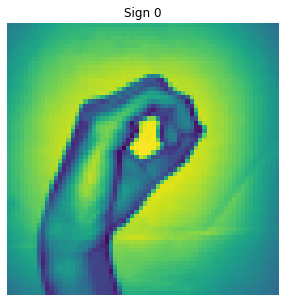

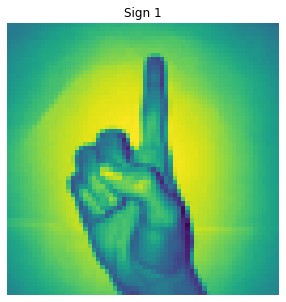

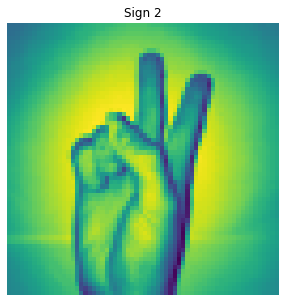

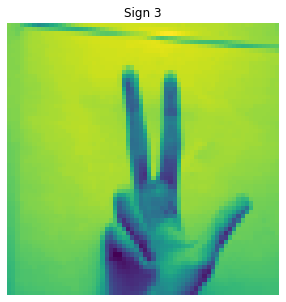

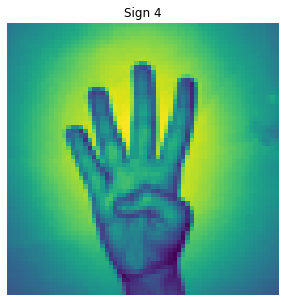

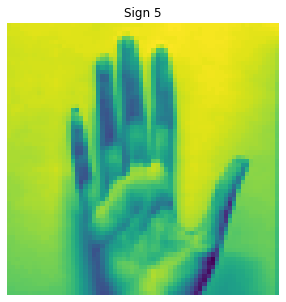

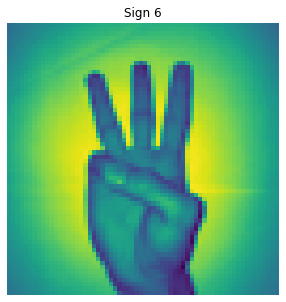

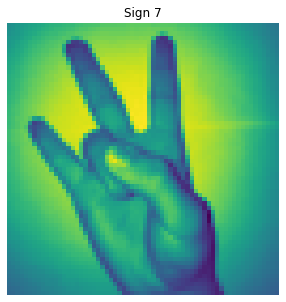

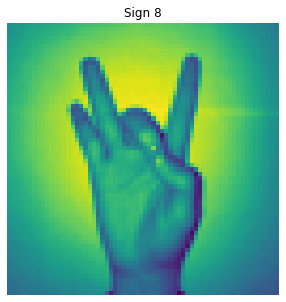

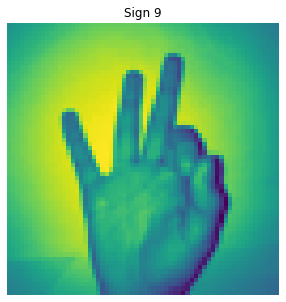

In [5]:
# load data set
x_load = np.load('D:/ML Data/Sign-language-digits-dataset/X.npy')
y_load = np.load('D:/ML Data/Sign-language-digits-dataset/Y.npy')
img_size = 64

# one sample from each digits
image_index_list = [260,900,1800,1600,1400,2061,700,500,1111,100]
for each in range(10):
    plt.figure(figsize=(8,5))
    plt.imshow(x_load[image_index_list[each]].reshape(img_size, img_size))
    plt.axis('off')
    title = "Sign " + str(each) 
    plt.title(title)
plt.show()

In [6]:
X = x_load.reshape((len(x_load), -1)) 
train = X
test = X[image_index_list]
n_pixels = X.shape[1]
# Upper half of the faces
X_train = train[:, :(n_pixels + 1) // 2]
X_test = test[:, :(n_pixels + 1) // 2]
# Lower half of the faces
y_train = train[:, n_pixels // 2:]
y_test = test[:, n_pixels // 2:]
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(2062, 2048)
(2062, 2048)
(10, 2048)
(10, 2048)


In [7]:
# Fit estimators
estimator = RidgeCV()
start = time.time()   # returns in second
estimator.fit(X_train, y_train)
end = time.time()
print("Training time is "+ str(end - start) + " second.")
start = time.time()   # returns in second
y_test_predict = estimator.predict(X_test)
end = time.time()
print("Prediction time is "+ str(end - start) + " second.")

Training time is 11.708256959915161 second.
Prediction time is 0.006720066070556641 second.


In [8]:
# # Plot the completed faces
image_shape = (64, 64)
n_faces = 10
n_cols = 1

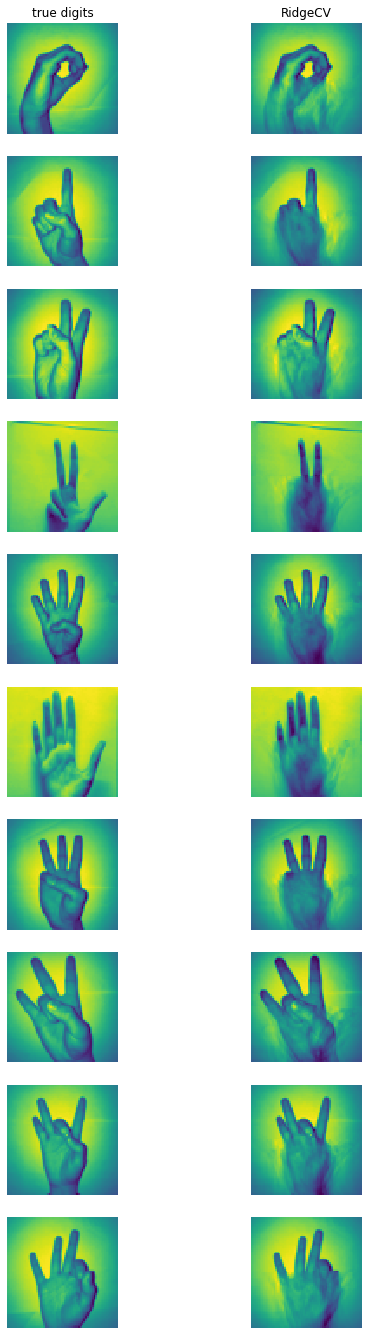

In [9]:
# Plot the completed faces
image_shape = (64, 64)
plt.figure(figsize=(8, 24))
for i in range(10):
    true_digits = np.hstack((X_test[i], y_test[i]))
    if i:
        sub = plt.subplot(10, 2, i * 2 + 1)
    else:
        sub = plt.subplot(10, 2, i * 2 + 1, title="true digits")
    
    sub.imshow(true_digits.reshape(image_shape),interpolation="nearest")
    sub.axis("off")
    completed_digits = np.hstack((X_test[i], y_test_predict[i]))

    if i:
        sub = plt.subplot(10, 2, i * 2 + 2 )

    else:
        sub = plt.subplot(10, 2, i * 2 + 2,title="RidgeCV")

    sub.imshow(completed_digits.reshape(image_shape),interpolation="nearest")
    sub.axis("off")

plt.show()

## Principle Componenet Analysis (PCA)

##### PCA: Principle componenet analysis
1. One of the most popular dimension reduction technique.
2. PCA uses high variances. It means that it likes diversity. For example compare two images above. oUt of red frame there    is no diversity (high variance). On the other hand, in red frames there is diversity.

    1. first step is decorrelation:
        2. rotates data samples to be aligned with axes
        3. shifts data SAmples so they have mean zero
        4. no information lost
        5. fit() : learn how to shift samples
        6. transform(): apply the learned transformation. It can also be applies test data( We do not use here but it is   
           good to know it.)
        7. Resulting PCA features are not linearly correlated
        8. Principle components: directions of variance

    2. Second step: intrinsic dimension: number of feature needed to approximate the data essential idea behind dimension          reduction
        1. PCA identifies intrinsic dimension when samples have any number of features
        2. intrinsic dimension = number of PCA feature with significant variance
        3. Lets apply PCA and visualize what PCA says to us.

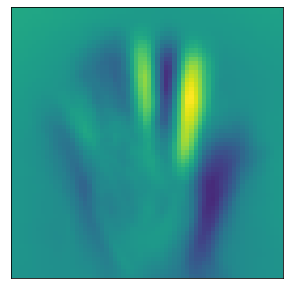

In [13]:
n_components = 3
(n_samples, n_features) = X.shape
estimator = decomposition.PCA(n_components=n_components, svd_solver='randomized', whiten=True)
estimator.fit(X)
components_ = estimator.components_
images = components_[:n_components]
plt.figure(figsize=(6, 5))
for i, comp in enumerate(images):
    vmax = max(comp.max(), -comp.min())
    plt.imshow(comp.reshape((64, 64)),interpolation='nearest',vmin=-vmax, vmax=vmax)
    plt.xticks(())
    plt.yticks(())
plt.savefig('graph.png')
plt.show()